# Table of Contents

**1. Libraries**

**2. Data Inspection**

**3. Data Cleaning**

**4. Question 1**

**5. Question 2**

**6. Question 3**


## Assumptions
In order to clean and analyze the data, the following assumptions were made:

1. There was one invalid case where the value in the column Gold was 10. This was converted to 1 because the columns 'Gold', 'Silver', 'Bronze' are recorder as binary (0 or 1), hence it was concluded that 10 should actually be 1.

2. There were two columns with missing values: Athlete and Gender. Although the missing values in 'Athlete' were treated, the ones in 'Gender' were ignored because this column was not used for answering the questions in the analysis.

3. In the 'Event' column the words "women" & "men" were removed because they were causing inconsistency and were of no added value; it is assumed that each gender participates in sports that are defined for their gender (e.g. a woman cannot participate in 100m men)

4. When multiple athletes have won the same number of medals, the alphabetical order of their name is used in order to select the top 5.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# Read data file
data = pd.read_csv('medals.csv')

## Data Inspection

In [3]:
data.head()

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
0,Athens (1896),1896,Aquatics,Swimming,alfred hajos,HUN,Men,100m freestyle men,Gold,1,0,0
1,Athens (1896),1896,Aquatics,Swimming,Otto Herschmann,AUT,Men,100m freestyle men,Silver,0,1,0
2,Athens (1896),1896,Aquatics,Swimming,dimitrios drivas,GRE,Men,100m freestyle for sailors men,Bronze,0,0,1
3,Athens (1896),1896,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100m freestyle for sailors men,Gold,1,0,0
4,Athens (1896),1896,Aquatics,Swimming,spiridon chasapis,GRE,Men,100m freestyle for sailors men,Silver,0,1,0


In [4]:
data.tail()

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
33256,Rio (2016),2016,Sailing,Sailing,Thomas Zajac,AUT,Unknown,0.5-1t,Bronze,0,0,1
33257,Rio (2016),2016,Gymnastics,Artistic Gymnastics,Chenglong Zhang,CHN,Unknown,"team, horizontal bar",Bronze,0,0,1
33258,Rio (2016),2016,Wrestling,Wrestling Freestyle,Fengliu Zhang,CHN,Unknown,67.5 - 75kg (middleweight),Bronze,0,0,1
33259,Rio (2016),2016,Badminton,Badminton,Yunlei Zhao,CHN,Unknown,doubles,Bronze,0,0,1
33260,Rio (2016),2016,Hockey,Hockey,Martin Zwicker,GER,Unknown,hockey,Bronze,0,0,1


In [5]:
# check df size & data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33261 entries, 0 to 33260
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Games       33261 non-null  object
 1   Year        33261 non-null  int64 
 2   Sport       33261 non-null  object
 3   Discipline  33261 non-null  object
 4   Athlete     33261 non-null  object
 5   Team        33261 non-null  object
 6   Gender      33261 non-null  object
 7   Event       33261 non-null  object
 8   Medal       33261 non-null  object
 9   Gold        33261 non-null  int64 
 10  Silver      33261 non-null  int64 
 11  Bronze      33261 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.0+ MB


In [6]:
# summary statistics
data.describe()

,Year,Gold,Silver,Bronze
count,33261.000000,33261.00000,33261.000000,33261.000000
mean,1973.340188,0.33640,0.330327,0.333544
std,33.940163,0.47534,0.470338,0.471486
min,1896.000000,0.00000,0.000000,0.000000
25%,1952.000000,0.00000,0.000000,0.000000
50%,1984.000000,0.00000,0.000000,0.000000
75%,2000.000000,1.00000,1.000000,1.000000
max,2016.000000,10.00000,1.000000,1.000000


In [7]:
data.describe(include=object)

,Games,Sport,Discipline,Athlete,Team,Gender,Event,Medal
count,33261,33261,33261,33261,33261,33261,33261,33261
unique,28,42,56,24251,150,3,879,3
top,Rio (2016),Aquatics,Athletics,#NAME?,USA,Men,football men,Gold
freq,2082,4508,3867,67,4869,22726,1233,11180


In [8]:
# examine how often specific values occur in a column
data["Medal"].value_counts()

Gold      11180
Bronze    11094
Silver    10987
Name: Medal, dtype: int64

In [9]:
data["Sport"].value_counts()

Aquatics             4508
Athletics            3867
Rowing               2811
Gymnastics           2397
Fencing              1679
Football             1630
Hockey               1530
Wrestling            1288
Cycling              1196
Shooting             1195
Canoe / Kayak        1165
Sailing              1154
Basketball           1084
Volleyball           1078
Handball             1064
Equestrian            984
Boxing                946
Weightlifting         638
Judo                  543
Archery               353
Baseball              335
Tennis                320
Rugby                 266
Modern Pentathlon     186
Softball              180
Badminton             168
Table Tennis          168
Taekwondo             144
Tug of War             94
Polo                   66
Lacrosse               59
Golf                   36
Skating                27
Ice Hockey             27
Cricket                24
Triathlon              18
Rackets                10
Croquet                 8
Water Motors

In [10]:
# check unique values in columns
data["Team"].nunique()

150

In [11]:
# check for missing values -- default 'NaN' type
data.isnull().sum()

Games         0
Year          0
Sport         0
Discipline    0
Athlete       0
Team          0
Gender        0
Event         0
Medal         0
Gold          0
Silver        0
Bronze        0
dtype: int64

In [12]:
# Making a list of missing value types that aren't recognised by pandas' default
missing_values = ["n/a", "na", "--", "#NAME?", "Unknown"]
data = pd.read_csv("medals.csv", na_values = missing_values)

In [13]:
data.isnull().sum()

Games            0
Year             0
Sport            0
Discipline       0
Athlete         67
Team             0
Gender        2145
Event            0
Medal            0
Gold             0
Silver           0
Bronze           0
dtype: int64

In [14]:
# check for duplicates
data[data.duplicated(keep=False)]

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
16098,Moscow (1980),1980,Hockey,Hockey,Singh Singh,IND,Men,hockey men,Gold,1,0,0
16099,Moscow (1980),1980,Hockey,Hockey,Singh Singh,IND,Men,hockey men,Gold,1,0,0
16928,Los Angeles (1984),1984,Athletics,Athletics,Carl Lewis,USA,Men,long jump men,Gold,1,0,0
16929,Los Angeles (1984),1984,Athletics,Athletics,Carl Lewis,USA,Men,long jump men,Gold,1,0,0
16930,Los Angeles (1984),1984,Athletics,Athletics,Carl Lewis,USA,Men,long jump men,Gold,1,0,0
16931,Los Angeles (1984),1984,Athletics,Athletics,Carl Lewis,USA,Men,long jump men,Gold,1,0,0
16932,Los Angeles (1984),1984,Athletics,Athletics,Carl Lewis,USA,Men,long jump men,Gold,1,0,0
16933,Los Angeles (1984),1984,Athletics,Athletics,Carl Lewis,USA,Men,long jump men,Gold,1,0,0
16934,Los Angeles (1984),1984,Athletics,Athletics,Carl Lewis,USA,Men,long jump men,Gold,1,0,0
16935,Los Angeles (1984),1984,Athletics,Athletics,Carl Lewis,USA,Men,long jump men,Gold,1,0,0


In [15]:
data.duplicated().sum()

30

## Data Cleaning

In [16]:
# remove rows with missing athlete names
data = data.dropna(subset=['Athlete'])

In [17]:
# Change invalid number 10 of column Gold to 1
data.Gold[data.Gold==10] = 1

In [18]:
data.describe(include=object)

,Games,Sport,Discipline,Athlete,Team,Gender,Event,Medal
count,33194,33194,33194,33194,33194,31084,33194,33194
unique,28,42,56,24250,150,2,879,3
top,Rio (2016),Aquatics,Athletics,Michael Phelps,USA,Men,football men,Gold
freq,2048,4506,3843,28,4857,22716,1231,11164


In [19]:
# change data type of Medal to categorical
data["Medal"] = pd.Categorical(data["Medal"])
data["Medal"].dtype

CategoricalDtype(categories=['Bronze', 'Gold', 'Silver'], ordered=False)

In [20]:
# verifying that every athlete has won 1 medal at a time
print(data[(data["Gold"] == 1) & (data["Silver"] != 0) & (data["Bronze"] != 0)].empty)
print(data[(data["Silver"] == 1) & (data["Gold"] != 0) & (data["Bronze"] != 0)].empty)
print(data[(data["Bronze"] == 1) & (data["Gold"] != 0) & (data["Silver"] != 0)].empty)

True
True
True


In [21]:
# Remove word "men" & "women" from Event, as they cause inconsistency and can be inferred from gender
data["Event"] = data["Event"].replace('women', '', regex=True)
data["Event"] = data["Event"].replace('men', '', regex=True)

In [22]:
# Remove whitespace
data['Event'] = data['Event'].str.strip()

In [23]:
data.duplicated().sum()

25

In [24]:
# remove duplicates by keeping 1st row
data = data.drop_duplicates(keep="first")

In [25]:
# sort data by athlete's name in alphabetical order
data = data.sort_values(by=['Athlete'])
data.head()

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
32112,Rio (2016),2016,Aquatics,Diving,' Francesca Dallape,ITA,NaN,3m springboard,Silver,0,1,0
30575,London (2012),2012,Canoe / Kayak,Canoe / Kayak F,' Ivan Shtyl,RUS,Men,C-1 1000m (canoe single),Bronze,0,0,1
30339,London (2012),2012,Cycling,Cycling Track,'ALMEIDA Michael D,FRA,Men,Team Sprint,Silver,0,1,0
32716,Rio (2016),2016,Cycling,Cycling Track,'ALMEIDA Michael D,FRA,NaN,Team Sprint,Bronze,0,0,1
30732,London (2012),2012,Equestrian,Jumping,'CONNOR Cian O,IRL,NaN,individual,Bronze,0,0,1


In [26]:
# remove special characters
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    data['Athlete'] = data['Athlete'].str.replace(char, '')

In [27]:
data.head()

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
32112,Rio (2016),2016,Aquatics,Diving,Francesca Dallape,ITA,NaN,3m springboard,Silver,0,1,0
30575,London (2012),2012,Canoe / Kayak,Canoe / Kayak F,Ivan Shtyl,RUS,Men,C-1 1000m (canoe single),Bronze,0,0,1
30339,London (2012),2012,Cycling,Cycling Track,ALMEIDA Michael D,FRA,Men,Team Sprint,Silver,0,1,0
32716,Rio (2016),2016,Cycling,Cycling Track,ALMEIDA Michael D,FRA,NaN,Team Sprint,Bronze,0,0,1
30732,London (2012),2012,Equestrian,Jumping,CONNOR Cian O,IRL,NaN,individual,Bronze,0,0,1


In [28]:
# convert names to lower case except for first letter
data['Athlete'] = data['Athlete'].str.title()
data['Athlete'] = data['Athlete'].str.strip()

In [29]:
data = data.sort_values(by=['Athlete'])
data.head()

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
503,Paris (1900),1900,Rugby,Rugby,A Albert,FRA,Men,rugby,Gold,1,0,0
5411,Amsterdam (1928),1928,Football,Football,A B Zumelzu,ARG,Men,football,Silver,0,1,0
5695,Amsterdam (1928),1928,Wrestling,Wrestling Freestyle,A Bögli,SUI,Men,79 - 87kg (light-heavyweight),Silver,0,1,0
5633,Amsterdam (1928),1928,Sailing,Sailing,A Faehlmann,EST,Men,6m,Bronze,0,0,1
4212,Paris (1924),1924,Aquatics,Water polo,A Fasani,FRA,Men,water polo,Gold,1,0,0


## Question 1

#### Top 5 athletes with gold in Athletics

In [30]:
# select data where sport is athletics & medal is gold
athletics = data[(data['Sport']=="Athletics") & (data['Medal']=='Gold')]

In [31]:
athletics.shape

(1281, 12)

In [32]:
athletics.head()

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
10895,Tokyo (1964),1964,Athletics,Athletics,Abdon Pamich,ITA,Men,50km walk,Gold,1,0,0
10937,Tokyo (1964),1964,Athletics,Athletics,Abebe Bikila,ETH,Men,marathon,Gold,1,0,0
10035,Rome (1960),1960,Athletics,Athletics,Abebe Bikila,ETH,Men,marathon,Gold,1,0,0
2040,Stockholm (1912),1912,Athletics,Athletics,Abel Kiviat,USA,Men,3000m team,Gold,1,0,0
8238,Helsinki (1952),1952,Athletics,Athletics,Adhemar Ferreira Da Silva,BRA,Men,triple jump,Gold,1,0,0


In [33]:
# sum gold medals per athlete
athletics = athletics.groupby('Athlete').agg({'Gold':['sum']})
athletics.columns = athletics.columns.droplevel(0)

In [34]:
athletics = athletics.sort_values(by=['Athlete'])
athletics.head()

,sum
Athlete,
Abdon Pamich,1
Abebe Bikila,2
Abel Kiviat,1
Adhemar Ferreira Da Silva,2
Adolfo Consolini,1


In [35]:
# top 5 with most gold medals
q1 = athletics.nlargest(5,'sum').reset_index()
print(q1)

         Athlete  sum
0     Carl Lewis    9
1    Paavo Nurmi    9
2     Usain Bolt    9
3       Ray Ewry    8
4  Allyson Felix    6


### Visualization of result

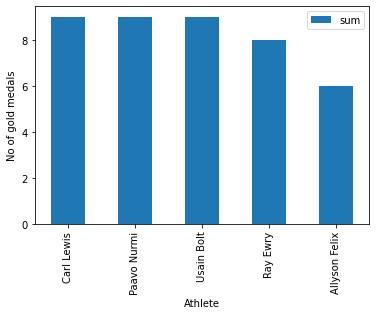

In [36]:
q1.plot(x='Athlete', y='sum',kind="bar")
plt.xlabel('Athlete')
plt.ylabel('No of gold medals')
plt.show()

## Question 2

#### Top 5 athletes with gold medals in largest number of different athletic events

In [37]:
# subset data on athletics & gold medals
q2 = data[(data['Sport']=="Athletics") & (data['Medal']=='Gold')]

In [38]:
q2.shape

(1281, 12)

In [39]:
q2.head()

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
10895,Tokyo (1964),1964,Athletics,Athletics,Abdon Pamich,ITA,Men,50km walk,Gold,1,0,0
10937,Tokyo (1964),1964,Athletics,Athletics,Abebe Bikila,ETH,Men,marathon,Gold,1,0,0
10035,Rome (1960),1960,Athletics,Athletics,Abebe Bikila,ETH,Men,marathon,Gold,1,0,0
2040,Stockholm (1912),1912,Athletics,Athletics,Abel Kiviat,USA,Men,3000m team,Gold,1,0,0
8238,Helsinki (1952),1952,Athletics,Athletics,Adhemar Ferreira Da Silva,BRA,Men,triple jump,Gold,1,0,0


In [40]:
# count distinct events per athlete
unique_events = q2.groupby('Athlete')['Event'].nunique().reset_index()

In [41]:
unique_events.head()

,Athlete,Event
0,Abdon Pamich,1
1,Abebe Bikila,1
2,Abel Kiviat,1
3,Adhemar Ferreira Da Silva,1
4,Adolfo Consolini,1


In [42]:
# Top 5 athletes with gold in largest number of different events (alphabetical)
unev = unique_events.nlargest(5,'Event').reset_index()
print(unev)

   index           Athlete  Event
0    711       Paavo Nurmi      6
1    918      Ville Ritola      5
2     34  Alvin Kraenzlein      4
3     94    Betty Cuthbert      4
4    110        Carl Lewis      4


In [43]:
# check how many athletes had 4 distinct events
len(unique_events[(unique_events['Event']==4)])

6

In [44]:
unique_events[unique_events['Event']==4]['Athlete'] 

34       Alvin Kraenzlein
94         Betty Cuthbert
110            Carl Lewis
272    Fanny Blankerskoen
351    Hannes Kolehmainen
455           Jesse Owens
Name: Athlete, dtype: object

### Visualization of results

#### Plot num of different events per athlete (top 5)

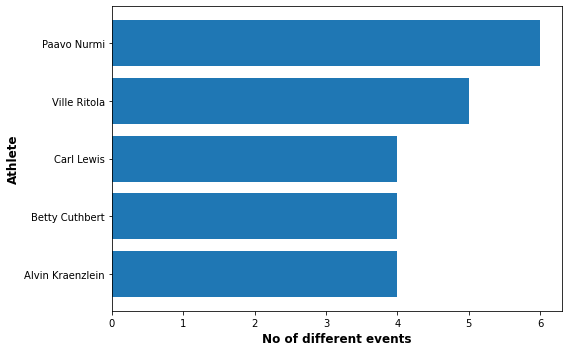

In [45]:
unev= unev.sort_values('Event',ascending=True)

fig,ax = plt.subplots(figsize = (8,5))
plt.barh(unev.Athlete, unev.Event)
plt.xlabel('No of different events', fontsize = 12, fontweight = 'bold')
plt.ylabel('Athlete', fontsize = 12, fontweight = 'bold')
plt.tight_layout()
plt.show()

#### Drill down: Plot medals per event per athlete

In [46]:
# most frequent events among those athletes
name_list = ['Paavo Nurmi', 'Ville Ritola', 'Alvin Kraenzlein', 'Betty Cuthbert', 'Carl Lewis']
e_freq = q2[(q2['Athlete'].isin(name_list))]

In [47]:
e_freq['event_count'] = e_freq.groupby(['Athlete', 'Event'])['Event'].transform('count')

<ipython-input-47-b72a434554b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e_freq['event_count'] = e_freq.groupby(['Athlete', 'Event'])['Event'].transform('count')


In [48]:
e_freq

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze,event_count
243,Paris (1900),1900,Athletics,Athletics,Alvin Kraenzlein,USA,Men,200m hurdles,Gold,1,0,0,1
268,Paris (1900),1900,Athletics,Athletics,Alvin Kraenzlein,USA,Men,60m,Gold,1,0,0,1
286,Paris (1900),1900,Athletics,Athletics,Alvin Kraenzlein,USA,Men,long jump,Gold,1,0,0,1
234,Paris (1900),1900,Athletics,Athletics,Alvin Kraenzlein,USA,Men,110m hurdles,Gold,1,0,0,1
10850,Tokyo (1964),1964,Athletics,Athletics,Betty Cuthbert,AUS,Women,400m,Gold,1,0,0,1
9012,Melbourne / Stockholm (1956),1956,Athletics,Athletics,Betty Cuthbert,AUS,Women,100m,Gold,1,0,0,1
9056,Melbourne / Stockholm (1956),1956,Athletics,Athletics,Betty Cuthbert,AUS,Women,4x100m relay,Gold,1,0,0,1
9024,Melbourne / Stockholm (1956),1956,Athletics,Athletics,Betty Cuthbert,AUS,Women,200m,Gold,1,0,0,1
19920,Barcelona (1992),1992,Athletics,Athletics,Carl Lewis,USA,Men,4x100m relay,Gold,1,0,0,2
16845,Los Angeles (1984),1984,Athletics,Athletics,Carl Lewis,USA,Men,4x100m relay,Gold,1,0,0,2


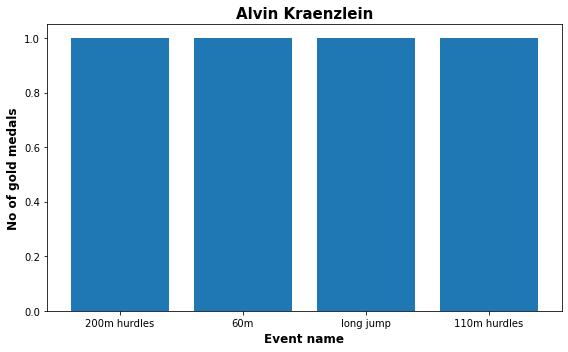

In [49]:
#plot data per athlete
df1 = e_freq[e_freq['Athlete'] == 'Alvin Kraenzlein']
fig,ax = plt.subplots(figsize = (8,5))
plt.bar(df1.Event, df1.event_count)
plt.title('Alvin Kraenzlein', fontweight = 'bold', fontsize=15)
plt.xlabel('Event name', fontsize = 12, fontweight = 'bold')
plt.ylabel('No of gold medals', fontsize = 12, fontweight = 'bold')
plt.tight_layout()
plt.show()

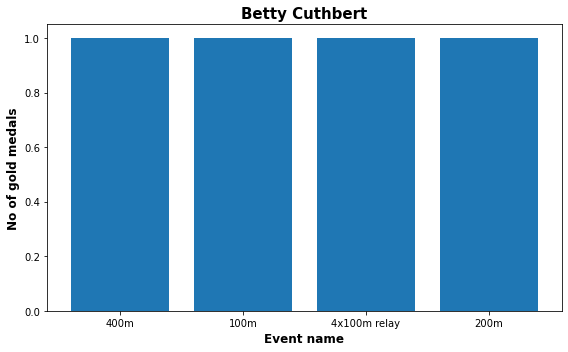

In [50]:
df2 = e_freq[e_freq['Athlete'] == 'Betty Cuthbert']
fig,ax = plt.subplots(figsize = (8,5))
plt.bar(df2.Event, df1.event_count)
plt.title('Betty Cuthbert', fontweight='bold', fontsize=15)
plt.xlabel('Event name', fontsize = 12, fontweight = 'bold')
plt.ylabel('No of gold medals', fontsize = 12, fontweight = 'bold')
plt.tight_layout()
plt.show()

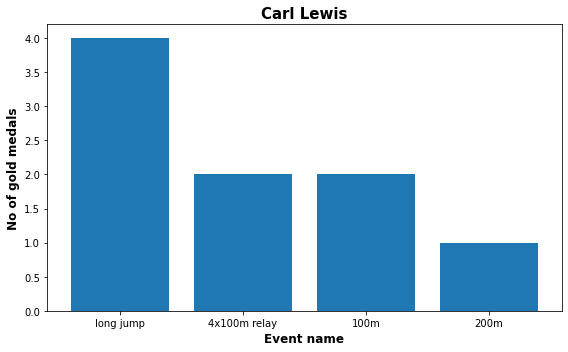

In [51]:
df3 = e_freq[e_freq['Athlete'] == 'Carl Lewis']
df3 = df3.sort_values('event_count', ascending=False)

fig,ax = plt.subplots(figsize = (8,5))
plt.bar(df3.Event, df3.event_count)
plt.title('Carl Lewis', fontweight='bold', fontsize=15)
plt.xlabel('Event name', fontsize = 12, fontweight = 'bold')
plt.ylabel('No of gold medals', fontsize = 12, fontweight = 'bold')
plt.tight_layout()
plt.show()

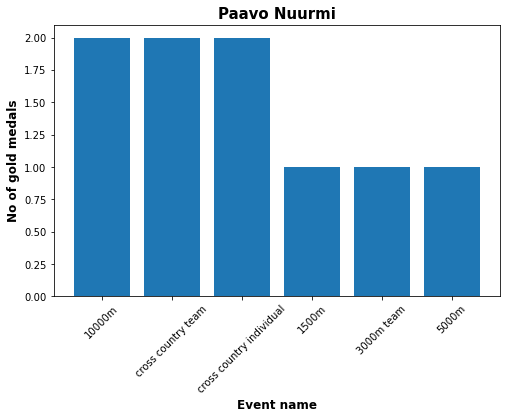

In [52]:
df4 = e_freq[e_freq['Athlete'] == 'Paavo Nurmi']
df4 = df4.sort_values('event_count', ascending=False)

fig,ax = plt.subplots(figsize = (8,5))
plt.bar(df4.Event, df4.event_count)
plt.title('Paavo Nuurmi', fontweight='bold', fontsize=15)
plt.xlabel('Event name', fontsize = 12, fontweight = 'bold')
plt.ylabel('No of gold medals', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation=45)
plt.show()

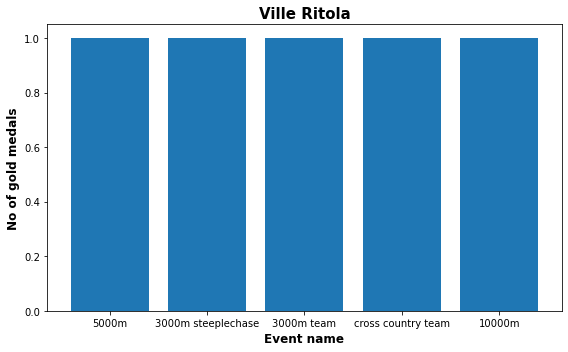

In [53]:
df5 = e_freq[e_freq['Athlete'] == 'Ville Ritola']
fig,ax = plt.subplots(figsize = (8,5))
plt.bar(df5.Event, df5.event_count)
plt.title('Ville Ritola', fontweight='bold', fontsize=15)
plt.xlabel('Event name', fontsize = 12, fontweight = 'bold')
plt.ylabel('No of gold medals', fontsize = 12, fontweight = 'bold')
plt.tight_layout()
plt.show()

#### Plot frequency of events across athletes

In [54]:
events = e_freq
events['sum_events'] = e_freq.groupby(['Event'])['Gold'].transform('sum')
events

<ipython-input-54-4e626d627660>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events['sum_events'] = e_freq.groupby(['Event'])['Gold'].transform('sum')


,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze,event_count,sum_events
243,Paris (1900),1900,Athletics,Athletics,Alvin Kraenzlein,USA,Men,200m hurdles,Gold,1,0,0,1,1
268,Paris (1900),1900,Athletics,Athletics,Alvin Kraenzlein,USA,Men,60m,Gold,1,0,0,1,1
286,Paris (1900),1900,Athletics,Athletics,Alvin Kraenzlein,USA,Men,long jump,Gold,1,0,0,1,5
234,Paris (1900),1900,Athletics,Athletics,Alvin Kraenzlein,USA,Men,110m hurdles,Gold,1,0,0,1,1
10850,Tokyo (1964),1964,Athletics,Athletics,Betty Cuthbert,AUS,Women,400m,Gold,1,0,0,1,1
9012,Melbourne / Stockholm (1956),1956,Athletics,Athletics,Betty Cuthbert,AUS,Women,100m,Gold,1,0,0,1,3
9056,Melbourne / Stockholm (1956),1956,Athletics,Athletics,Betty Cuthbert,AUS,Women,4x100m relay,Gold,1,0,0,1,3
9024,Melbourne / Stockholm (1956),1956,Athletics,Athletics,Betty Cuthbert,AUS,Women,200m,Gold,1,0,0,1,2
19920,Barcelona (1992),1992,Athletics,Athletics,Carl Lewis,USA,Men,4x100m relay,Gold,1,0,0,2,3
16845,Los Angeles (1984),1984,Athletics,Athletics,Carl Lewis,USA,Men,4x100m relay,Gold,1,0,0,2,3


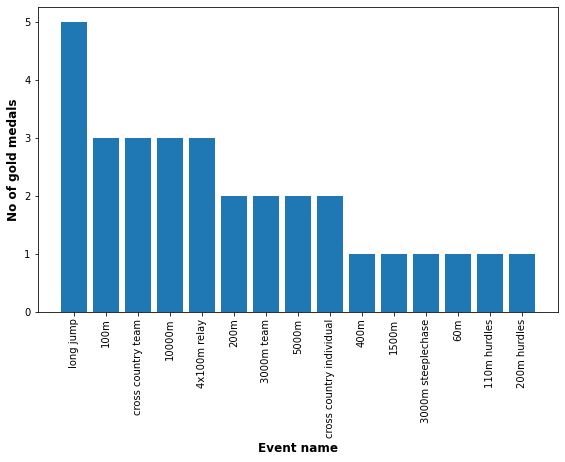

In [55]:
events= events.sort_values('sum_events',ascending=False)

fig,ax = plt.subplots(figsize = (8,5))
plt.bar(events.Event, events.sum_events)
plt.xlabel('Event name', fontsize = 12, fontweight = 'bold')
plt.ylabel('No of gold medals', fontsize = 12, fontweight = 'bold')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

## Question 3

In [56]:
# drop rows with 1st & 3rd athlete from q2

doping = ['Paavo Nurmi', 'Alvin Kraenzlein']
q3 = q2.drop(q2[(q2['Athlete'].isin(doping))].index)

In [57]:
q3.shape

(1268, 12)

In [58]:
q3 = q3.sort_values(by=['Athlete'])

In [59]:
# count distinct number of events per athlete
q3_unev = q3.groupby('Athlete')['Event'].nunique().reset_index()

In [60]:
q3_unev.head()

,Athlete,Event
0,Abdon Pamich,1
1,Abebe Bikila,1
2,Abel Kiviat,1
3,Adhemar Ferreira Da Silva,1
4,Adolfo Consolini,1


In [61]:
q3_new = q3_unev.nlargest(5,'Event').reset_index()
print(q3_new)

   index             Athlete  Event
0    916        Ville Ritola      5
1     93      Betty Cuthbert      4
2    109          Carl Lewis      4
3    271  Fanny Blankerskoen      4
4    350  Hannes Kolehmainen      4


In [62]:
# check how many athletes had 4 distinct events
len(q3_unev[(q3_unev['Event']==4)])

5

In [63]:
q3_unev[q3_unev['Event']==4]['Athlete'] 

93         Betty Cuthbert
109            Carl Lewis
271    Fanny Blankerskoen
350    Hannes Kolehmainen
454           Jesse Owens
Name: Athlete, dtype: object

### Visualization of results

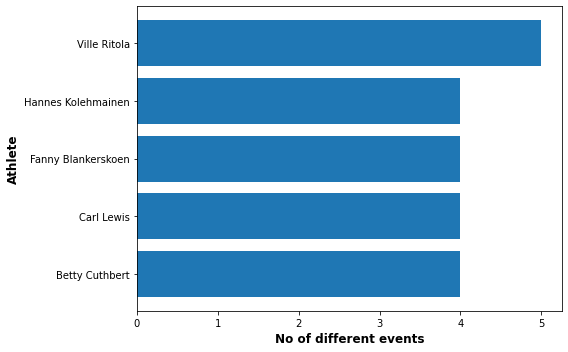

In [64]:
q3_new= q3_new.sort_values('Event',ascending=True)

fig,ax = plt.subplots(figsize = (8,5))
plt.barh(q3_new.Athlete, q3_new.Event)
plt.xlabel('No of different events', fontsize = 12, fontweight = 'bold')
plt.ylabel('Athlete', fontsize = 12, fontweight = 'bold')
plt.tight_layout()
plt.show()